# Car Engine health prediction - Machine Learning 🏎️

### Importing the data

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import pickle

In [2]:
df = pd.read_csv("engine_data.csv")
df.head(10)

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0
5,1221,3.989226,6.679231,2.214250,76.401152,75.669818,0
6,716,3.568896,5.312266,2.461067,83.646589,79.792411,1
7,729,3.845166,10.191126,2.362998,77.921202,71.671761,1
8,845,4.877239,3.638269,3.525604,76.301626,70.496024,0
9,824,3.741228,7.626214,1.301032,77.066520,85.143297,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [4]:
df.describe().round(3)

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000,19535.000,19535.000,19535.000,19535.000,19535.000,19535.000
mean,791.239,3.304,6.656,2.335,77.643,78.427,0.631
std,267.611,1.022,2.761,1.036,3.111,6.207,0.483
min,61.000,0.003,0.003,0.002,71.322,61.673,0.000
25%,593.000,2.519,4.917,1.600,75.726,73.895,0.000
50%,746.000,3.162,6.202,2.167,76.817,78.347,1.000
75%,934.000,4.055,7.745,2.849,78.072,82.915,1.000
max,2239.000,7.266,21.138,7.479,89.581,195.528,1.000


In [5]:
df['Engine Condition'].value_counts()
# "0" Engine in a normal or healthy condition
# "1" Engine in a faulty or problematic condition

Engine Condition
1    12317
0     7218
Name: count, dtype: int64

### Check for outlier (Increase the accuracy)

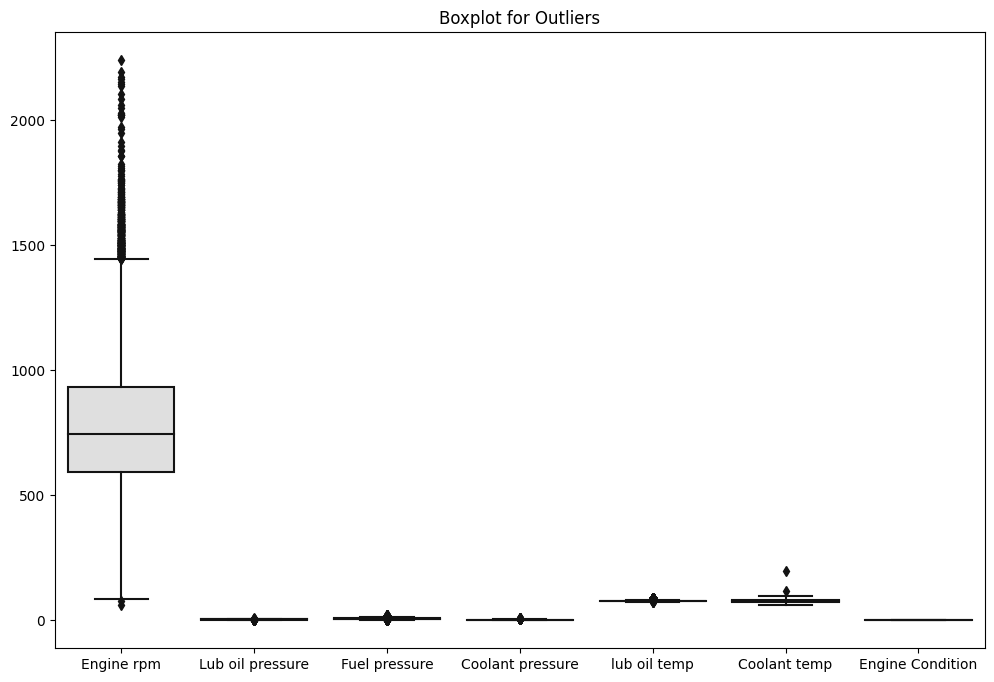

In [6]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, palette='binary')
plt.title("Boxplot for Outliers")
plt.show()

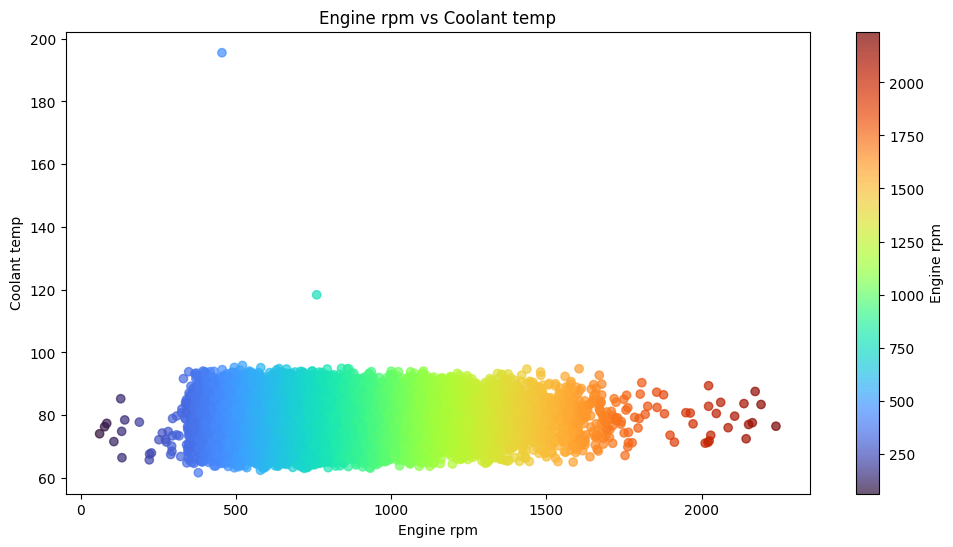

In [7]:
plt.figure(figsize =(12, 6))
scatter = plt.scatter(
    df["Engine rpm"],
    df["Coolant temp"],
    c = df["Engine rpm"],
    cmap = 'turbo',
    alpha = 0.7
)
plt.colorbar(scatter, label = 'Engine rpm')
plt.title("Engine rpm vs Coolant temp")
plt.xlabel("Engine rpm")
plt.ylabel("Coolant temp")
plt.show()

#### Using IQR technique (Inter Quantile Range)

In [8]:
df_temp = df.drop(columns=["Engine Condition"])
df_temp

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,700,2.493592,11.790927,3.178981,84.144163,81.632187
1,876,2.941606,16.193866,2.464504,77.640934,82.445724
2,520,2.961746,6.553147,1.064347,77.752266,79.645777
3,473,3.707835,19.510172,3.727455,74.129907,71.774629
4,619,5.672919,15.738871,2.052251,78.396989,87.000225
...,...,...,...,...,...,...
19530,902,4.117296,4.981360,4.346564,75.951627,87.925087
19531,694,4.817720,10.866701,6.186689,75.281430,74.928459
19532,684,2.673344,4.927376,1.903572,76.844940,86.337345
19533,696,3.094163,8.291816,1.221729,77.179693,73.624396


In [9]:
Q1 = df_temp[['Engine rpm', 'Coolant temp']].quantile(0.25)
print(Q1)
print("-------------------------------")
Q3 = df_temp[['Engine rpm', 'Coolant temp']].quantile(0.75)
print(Q3)

Engine rpm      593.000000
Coolant temp     73.895421
Name: 0.25, dtype: float64
-------------------------------
Engine rpm      934.000000
Coolant temp     82.915411
Name: 0.75, dtype: float64


In [10]:
IQR = Q3 - Q1
print(IQR)

Engine rpm      341.00000
Coolant temp      9.01999
dtype: float64


In [11]:
lower_limit = Q1 - 1.5*IQR
print(lower_limit)
print("-------------------------------")
upper_limit = Q3 + 1.5*IQR
print(upper_limit)

Engine rpm      81.500000
Coolant temp    60.365435
dtype: float64
-------------------------------
Engine rpm      1445.500000
Coolant temp      96.445397
dtype: float64


In [12]:
outlier_mask = (df[['Engine rpm', 'Coolant temp']] < lower_limit) | (df[['Engine rpm', 'Coolant temp']] > upper_limit)
outliers = df[outlier_mask.any(axis=1)] 
outliers

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
55,1674,2.501620,3.624157,2.043075,76.772327,74.641940,0
88,1776,3.648060,5.873874,1.318790,76.481421,71.233786,0
102,1481,3.972600,5.701680,1.556111,75.997690,93.791609,0
108,1661,3.518121,11.802902,2.951991,76.725921,72.872725,0
143,1620,1.536989,6.398304,2.423895,75.163334,77.340058,0
...,...,...,...,...,...,...,...
19241,2136,3.311171,7.282090,1.678657,75.783308,83.707670,1
19357,1556,4.786442,7.678463,4.029723,78.774495,71.273450,0
19409,1586,5.044422,8.794704,2.523254,77.276628,70.349750,1
19447,1807,3.727537,14.140429,4.446769,77.008190,90.369222,1


In [13]:
percentage = (466/19535)*100
print("Data loss due to outlier :", percentage)  # That's Okay 

Data loss due to outlier : 2.385461991297671


#### Removing Outlier 

In [14]:
df_cleaned = df[~outlier_mask.any(axis=1)]
df_cleaned

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0
...,...,...,...,...,...,...,...
19530,902,4.117296,4.981360,4.346564,75.951627,87.925087,1
19531,694,4.817720,10.866701,6.186689,75.281430,74.928459,1
19532,684,2.673344,4.927376,1.903572,76.844940,86.337345,1
19533,696,3.094163,8.291816,1.221729,77.179693,73.624396,1


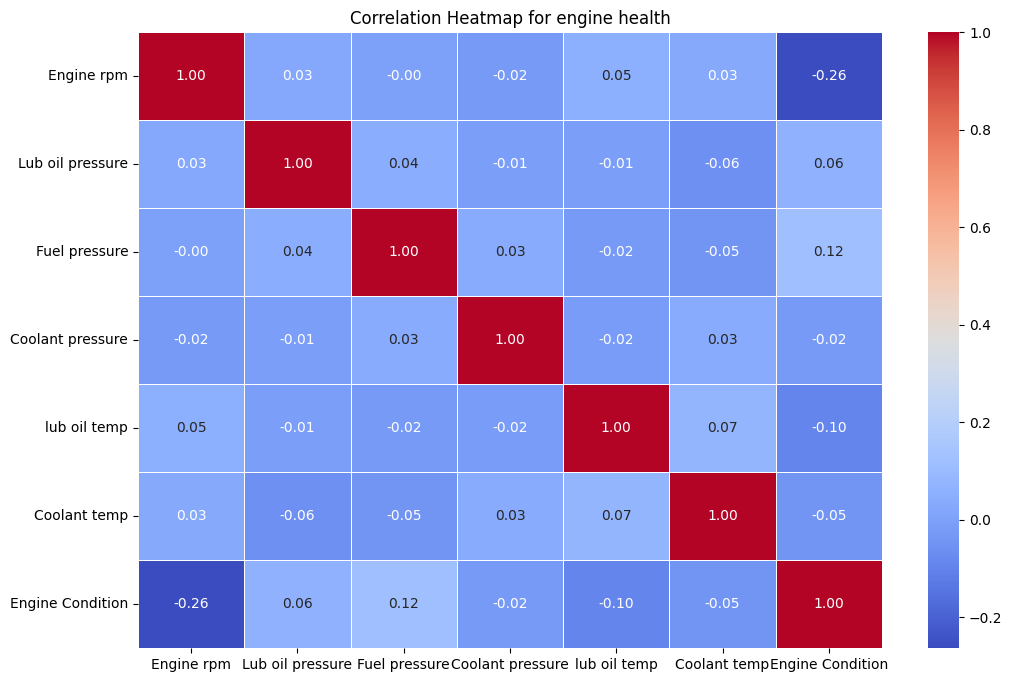

In [15]:
correlation = df_cleaned.corr()

plt.figure(figsize =(12, 8))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title("Correlation Heatmap for engine health")
plt.show() 
# All the features have weak correlations with the target variable Engine Condition. 
#This suggests that none of these features alone strongly predict the engine condition

In [16]:
df_cleaned.round(3)

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.494,11.791,3.179,84.144,81.632,1
1,876,2.942,16.194,2.465,77.641,82.446,0
2,520,2.962,6.553,1.064,77.752,79.646,1
3,473,3.708,19.510,3.727,74.130,71.775,1
4,619,5.673,15.739,2.052,78.397,87.000,0
...,...,...,...,...,...,...,...
19530,902,4.117,4.981,4.347,75.952,87.925,1
19531,694,4.818,10.867,6.187,75.281,74.928,1
19532,684,2.673,4.927,1.904,76.845,86.337,1
19533,696,3.094,8.292,1.222,77.180,73.624,1


### KNN algorithm

In [17]:
X = df_cleaned.drop(columns=["Engine Condition"])
Y = df_cleaned['Engine Condition']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)    


knn = KNeighborsClassifier(
    n_neighbors = 25
)

knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=25)

In [19]:
#print(X_train.shape)
#print(x_test.shape)
Y_pred = knn.predict(x_test)

In [20]:
Knn_accuracy = accuracy_score(y_test, Y_pred)
print(f"Accuracy KNN: {Knn_accuracy*100}")

Accuracy KNN: 65.5742003146303


In [21]:
print("Classification Report:")
print(classification_report(y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.35      0.42      1358
           1       0.70      0.82      0.75      2456

    accuracy                           0.66      3814
   macro avg       0.61      0.59      0.59      3814
weighted avg       0.64      0.66      0.64      3814



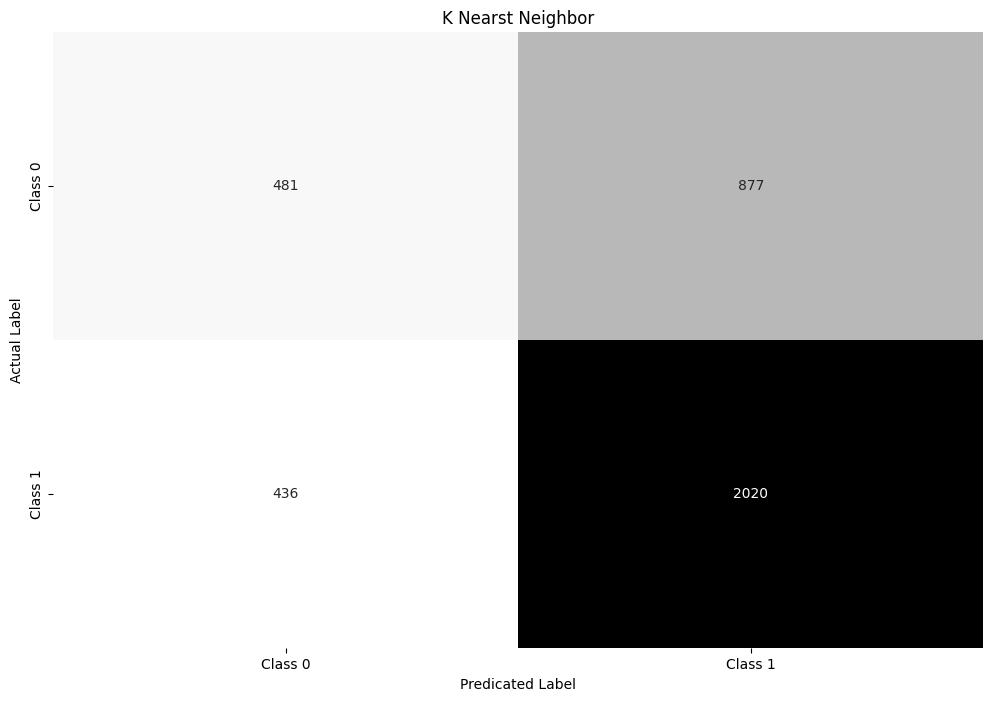

In [22]:
cm = confusion_matrix(y_test, Y_pred)

plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, fmt ='d' , cmap = "binary", cbar = False ,xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicated Label")
plt.ylabel("Actual Label")
plt.title("K Nearst Neighbor")
plt.show()

In [50]:
with open("knn_model.pkl", 'wb') as file:
    pickle.dump(knn, file)
    
print("Knn model saved succesfully")

Knn model saved succesfully


## SVM

In [47]:
from sklearn.svm import SVC

svm = SVC(
    kernel ="linear",
    C = 1.0,
    degree = 3, 
    gamma = "scale"
)
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [44]:
y_pred = svm.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy SVM:", svm_accuracy*100)

Accuracy SVM: 66.59674882013634


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.20      0.30      1358
           1       0.68      0.92      0.78      2456

    accuracy                           0.67      3814
   macro avg       0.63      0.56      0.54      3814
weighted avg       0.65      0.67      0.61      3814



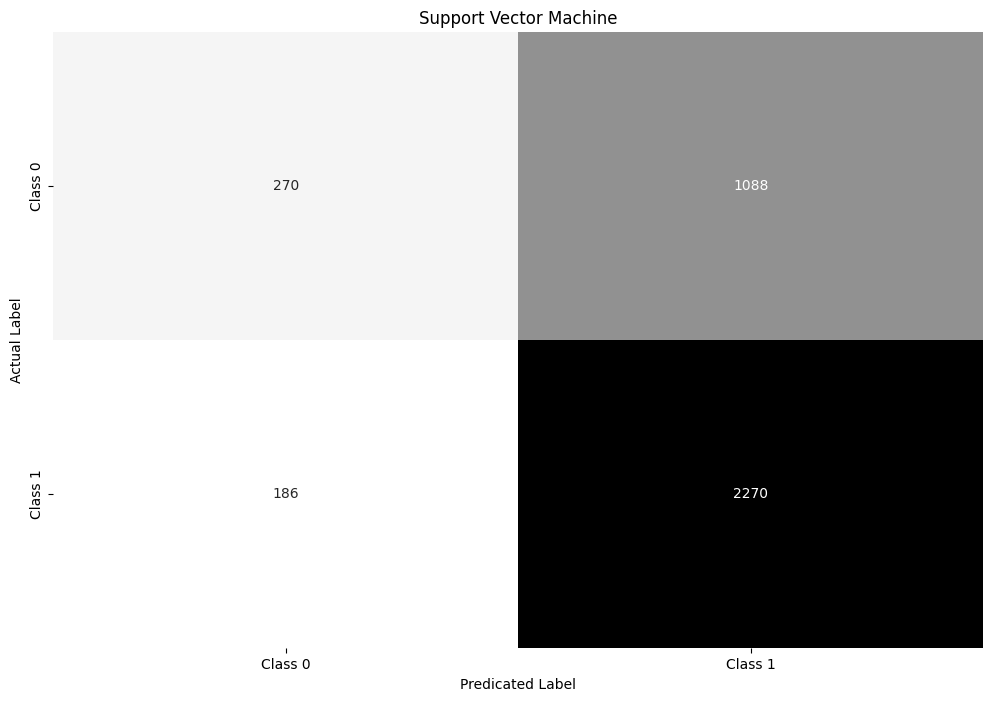

In [27]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, fmt ='d' , cmap = "binary", cbar = False ,xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicated Label")
plt.ylabel("Actual Label")
plt.title("Support Vector Machine")
plt.show()

### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

rdf = RandomForestClassifier(
    n_estimators = 100, 
    random_state = 42
)
rdf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [29]:
Rfy_pred = rdf.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rdf_accuracy = accuracy_score(Rfy_pred, y_test)
print("Accuracy RandomForest: ", rdf_accuracy*100)

Accuracy RandomForest:  66.28211851074987


In [31]:
print(classification_report(y_test, Rfy_pred))

              precision    recall  f1-score   support

           0       0.53      0.41      0.47      1358
           1       0.71      0.80      0.75      2456

    accuracy                           0.66      3814
   macro avg       0.62      0.61      0.61      3814
weighted avg       0.65      0.66      0.65      3814



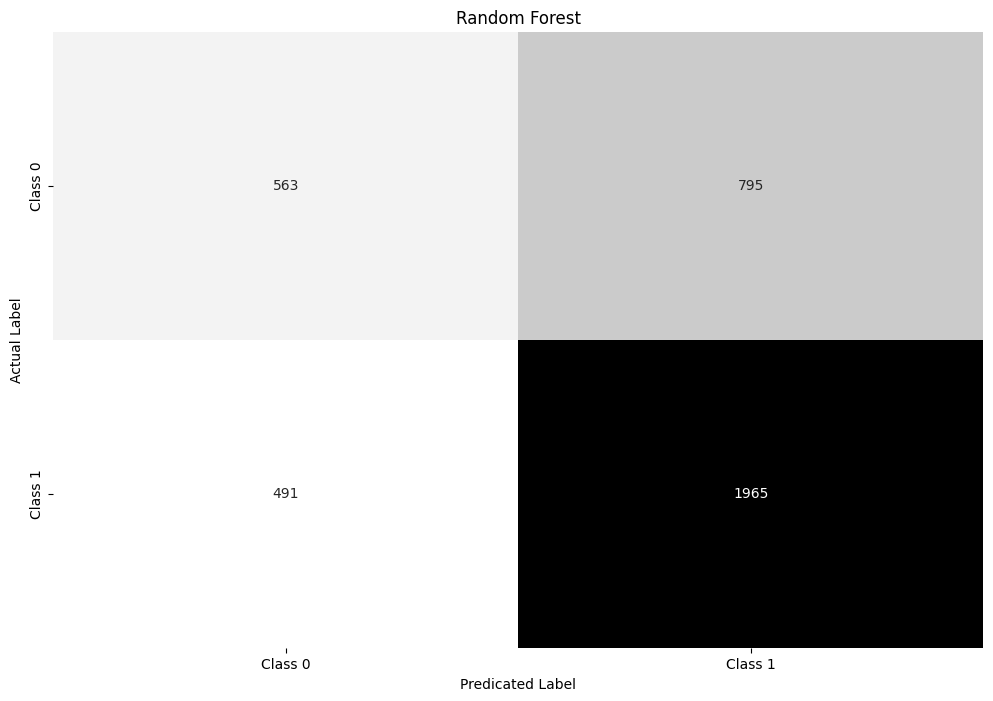

In [32]:
cm = confusion_matrix(y_test, Rfy_pred)

plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, fmt ='d' , cmap = "binary", cbar = False ,xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicated Label")
plt.ylabel("Actual Label")
plt.title("Random Forest")
plt.show()

In [54]:
with open("randonF_model.pkl", 'wb') as file:
    pickle.dump(rdf, file)
    
print("Randon_F model saved succesfully ")

Randon_F model saved succesfully 


### XGBoost

In [33]:
pip install xgboost


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [34]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning)

In [35]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators = 100, 
    random_state = 42, 
    use_label_encoder=False, 
    eval_metric = 'logloss' 
)
xgb.fit(X_train, Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [36]:
xgbY_pred = xgb.predict(x_test)

In [37]:
xgb_accuracy = accuracy_score(xgbY_pred, y_test)
print("Accuracy XGBoost :",xgb_accuracy*100)

Accuracy XGBoost : 65.04981646565285


In [38]:
print("Classification Report:")
print(classification_report(y_test, xgbY_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.38      0.44      1358
           1       0.70      0.80      0.75      2456

    accuracy                           0.65      3814
   macro avg       0.61      0.59      0.59      3814
weighted avg       0.63      0.65      0.64      3814



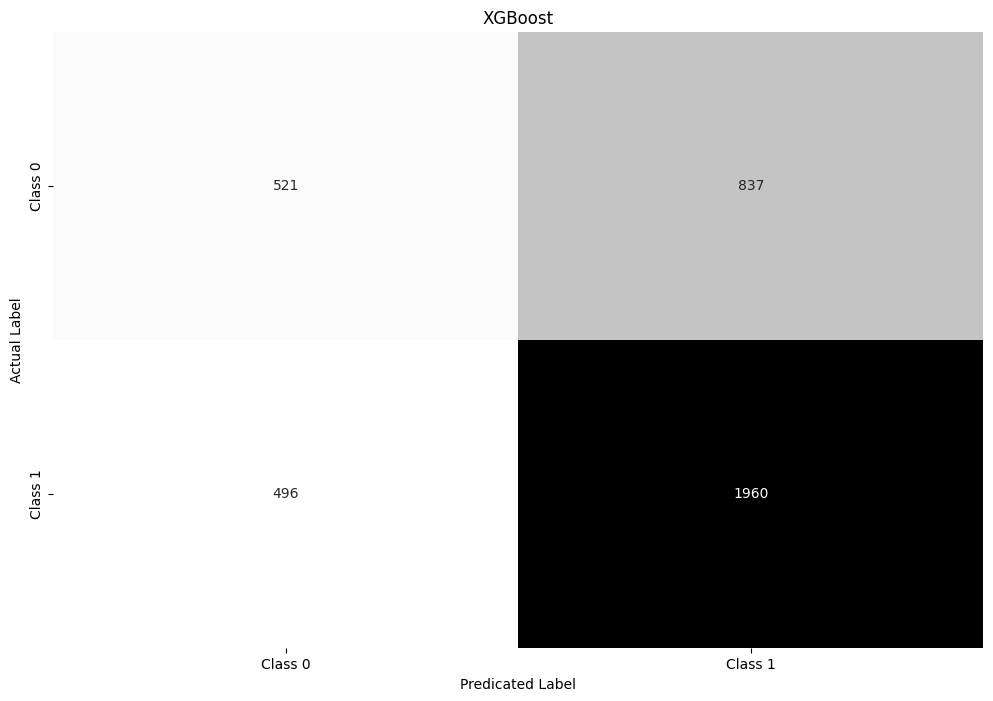

In [39]:
cm = confusion_matrix(y_test, xgbY_pred)

plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, fmt ='d' , cmap = "binary", cbar = False ,xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicated Label")
plt.ylabel("Actual Label")
plt.title("XGBoost")
plt.show()

In [53]:
with open("Xboost_model.pkl", 'wb') as file:
    pickle.dump(xgb, file)

print("XBoost Model saved successfully")

XBoost Model saved successfully


In [40]:
print(f"KNN Accuracy: {Knn_accuracy*100}")
print(f"SVM Accuracy: {svm_accuracy*100}")
print(f"Random Forest Accuracy: {rdf_accuracy*100}")
print(f"XGBoost Accuracy: {xgb_accuracy*100}")

KNN Accuracy: 65.5742003146303
SVM Accuracy: 66.59674882013634
Random Forest Accuracy: 66.28211851074987
XGBoost Accuracy: 65.04981646565285


In [48]:
import pickle

with open("svm_model.pkl", 'wb') as file:
    pickle.dump(svm, file)

print("Model saved successfully")

Model saved successfully


# ⚠️ Only for developers

### Testing with custom input data.. Engine health check

In [76]:
import pandas as pd
import numpy as np

try:
    input_log = pd.read_csv('engine_health_log.csv')
except FileNotFoundError:
    input_log = pd.DataFrame(
        columns=['Engine rpm',                    
                 'Lub oil pressure',              
                 'Fuel pressure',                        
                 'Coolant pressure',                    
                 'Lub oil temp',                
                 'Coolant temp',               
                 'Engine condition'                              
])
def predict_engine_health(input_data, model, scaler, log_df):
    input_array = np.array(input_data).reshape(1, -1)
    
    input_scaled = scaler.transform(input_array)
    
    prediction = model.predict(input_scaled)
    
    if prediction[0] == 0:
        Health_status = "Engine is in good health"
    else:
        Health_status = "Engine is not in good health"  
        
    print(Health_status)
    
    input_data.append(prediction[0])
    log_df.loc[len(log_df)] = input_data
    
    return Health_status
        
input_data = [
    float(input("Enter Engine rpm: ")),
    float(input("Enter Lub oil pressure: ")),
    float(input("Enter Fuel pressure: ")),
    float(input("Enter Coolant pressure: ")),
    float(input("Enter Lub oil temp: ")),
    float(input("Enter Coolant temp: "))
]
model_choice = input("Enter model name: " ).strip().lower()

if model_choice == "knn":
    model = knn
elif model_choice == "svm":
    model = svm
elif model_choice == "randomforest":
    model = rdf
elif model_choice == "xgboost":
    model = xgb
else:
    print("Invalid model name")
    model = None

if model:    
    result = predict_engine_health(input_data, model, scaler, input_log)
    print(result)
    
input_log.to_csv("Engine_health_log.csv", index = False)
print("\nInput Log saved to 'engine_health_log.csv'")

Enter Engine rpm: 1000
Enter Lub oil pressure: 4
Enter Fuel pressure: 5
Enter Coolant pressure: 4
Enter Lub oil temp: 78
Enter Coolant temp: 80
Enter model name: knn
Engine is in good health
Engine is in good health

Input Log saved to 'engine_health_log.csv'


In [77]:
input_log

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,Lub oil temp,Coolant temp,Engine condition
0,800.0,3.4,4.0,4.0,75.0,76.0,1.0
1,800.0,4.0,5.0,6.0,74.0,80.0,1.0
2,800.0,5.0,6.0,4.0,76.0,70.0,1.0
3,1000.0,4.0,5.0,4.0,78.0,80.0,0.0


# 🏁  🏁  🏁  🏁  🏁  🏁  🏁 - FINISH - 🏁  🏁  🏁  🏁  🏁  🏁  🏁